# **Diabetes prediction dataset**

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

In [ ]:
#MOUNTING OUR DRIVE TO GOOGLE COLAB
from google.colab import drive
#drive.mount('/drive') #Yee Sin
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd

In [ ]:
#path = "/drive/MyDrive/Colab Notebooks/ODL dataset/diabetes_prediction_dataset.csv" #Yee Sin

#path = "/drive/MyDrive/ODL/diabetes_prediction_dataset.csv" #Naimur Rahman
#path = "/content/drive/MyDrive/diabetes_prediction_dataset.csv" # Jeng Yen
#path = "/content/drive/MyDrive/Colab Notebooks/Lab/diabetes_prediction_dataset.csv" # Jk

data = pd.read_csv(path)

In [ ]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
# Drop any duplicates
data.drop_duplicates(inplace=True)

In [ ]:
data.fillna(data.median(), inplace=True)

<ipython-input-8-48d8393c03d4>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace=True)


In [ ]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
data.shape

(96146, 9)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit the encoder on the 'Gender' column and transform it
data['gender'] = le.fit_transform(data['gender'])


data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
data['age'] = data['age'].astype(int)

In [ ]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,never,25.19,6.6,140,0
1,0,54,0,0,No Info,27.32,6.6,80,0
2,1,28,0,0,never,27.32,5.7,158,0
3,0,36,0,0,current,23.45,5.0,155,0
4,1,76,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36,0,0,No Info,24.60,4.8,145,0
99996,0,2,0,0,No Info,17.37,6.5,100,0
99997,1,66,0,0,former,27.83,5.7,155,0
99998,0,24,0,0,never,35.42,4.0,100,0


In [ ]:
data.describe()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,0.416065,41.783756,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,0.493287,22.482208,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.000000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
data = pd.get_dummies(data, columns=['smoking_history'])

In [ ]:
data

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80,0,1,25.19,6.6,140,0,0,0,0,0,1,0
1,0,54,0,0,27.32,6.6,80,0,1,0,0,0,0,0
2,1,28,0,0,27.32,5.7,158,0,0,0,0,0,1,0
3,0,36,0,0,23.45,5.0,155,0,0,1,0,0,0,0
4,1,76,1,1,20.14,4.8,155,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0,36,0,0,24.60,4.8,145,0,1,0,0,0,0,0
99996,0,2,0,0,17.37,6.5,100,0,1,0,0,0,0,0
99997,1,66,0,0,27.83,5.7,155,0,0,0,0,1,0,0
99998,0,24,0,0,35.42,4.0,100,0,0,0,0,0,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       96146 non-null  int64  
 1   age                          96146 non-null  int64  
 2   hypertension                 96146 non-null  int64  
 3   heart_disease                96146 non-null  int64  
 4   bmi                          96146 non-null  float64
 5   HbA1c_level                  96146 non-null  float64
 6   blood_glucose_level          96146 non-null  int64  
 7   diabetes                     96146 non-null  int64  
 8   smoking_history_No Info      96146 non-null  uint8  
 9   smoking_history_current      96146 non-null  uint8  
 10  smoking_history_ever         96146 non-null  uint8  
 11  smoking_history_former       96146 non-null  uint8  
 12  smoking_history_never        96146 non-null  uint8  
 13  smoking_history_

In [ ]:
from sklearn.model_selection import train_test_split
# Target (dependent variable) and features (independent variables)
Y = data['diabetes']
X = data.drop('diabetes', axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

In [ ]:
X

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80,0,1,25.19,6.6,140,0,0,0,0,1,0
1,0,54,0,0,27.32,6.6,80,1,0,0,0,0,0
2,1,28,0,0,27.32,5.7,158,0,0,0,0,1,0
3,0,36,0,0,23.45,5.0,155,0,1,0,0,0,0
4,1,76,1,1,20.14,4.8,155,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0,36,0,0,24.60,4.8,145,1,0,0,0,0,0
99996,0,2,0,0,17.37,6.5,100,1,0,0,0,0,0
99997,1,66,0,0,27.83,5.7,155,0,0,0,1,0,0
99998,0,24,0,0,35.42,4.0,100,0,0,0,0,1,0


In [ ]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 96146, dtype: int64

In [ ]:
#Resampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy=0.5, k_neighbors=5, random_state=1)
under = RandomUnderSampler(sampling_strategy=0.8, random_state=1)

pipeline = Pipeline([('over', over), ('under', under)])
X_train_resampled, Y_train_resampled = pipeline.fit_resample(X_train, Y_train)

In [ ]:
print("Original training set class distribution:")
print(Y_train.value_counts())

print("\nResampled training set class distribution:")
print(pd.Series(Y_train_resampled).value_counts())

Original training set class distribution:
0    61365
1     5937
Name: diabetes, dtype: int64

Resampled training set class distribution:
0    38352
1    30682
Name: diabetes, dtype: int64


# **Plots**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
corr = data.corr(method = 'pearson')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-34-e2cefa48f6cd>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
gender,1.00,-0.03,0.01,0.08,-0.02,0.02,0.02,0.04,0.06,0.03,0.01,0.05,-0.10,-0.01
age,-0.03,1.00,0.26,0.24,0.35,0.11,0.11,0.26,-0.29,0.03,0.07,0.22,0.07,0.07
hypertension,0.01,0.26,1.00,0.12,0.15,0.08,0.08,0.20,-0.11,0.02,0.02,0.08,0.04,-0.00
heart_disease,0.08,0.24,0.12,1.00,0.06,0.07,0.07,0.17,-0.05,0.01,0.04,0.09,-0.03,0.01
bmi,-0.02,0.35,0.15,0.06,1.00,0.08,0.09,0.21,-0.23,0.05,0.04,0.11,0.09,0.04
HbA1c_level,0.02,0.11,0.08,0.07,0.08,1.00,0.17,0.41,-0.04,0.01,0.01,0.04,0.01,0.01
blood_glucose_level,0.02,0.11,0.08,0.07,0.09,0.17,1.00,0.42,-0.05,0.01,0.01,0.04,0.01,0.01
diabetes,0.04,0.26,0.20,0.17,0.21,0.41,0.42,1.00,-0.11,0.02,0.02,0.10,0.02,0.02
smoking_history_No Info,0.06,-0.29,-0.11,-0.05,-0.23,-0.04,-0.05,-0.11,1.00,-0.23,-0.15,-0.24,-0.54,-0.19
smoking_history_current,0.03,0.03,0.02,0.01,0.05,0.01,0.01,0.02,-0.23,1.00,-0.07,-0.11,-0.24,-0.09


In [ ]:
target_variable = 'diabetes'
abs_corr = corr.abs()
top3_corr = abs_corr[target_variable].sort_values(ascending=False)[1:4]
print(top3_corr)

blood_glucose_level    0.424336
HbA1c_level            0.406408
age                    0.264846
Name: diabetes, dtype: float64


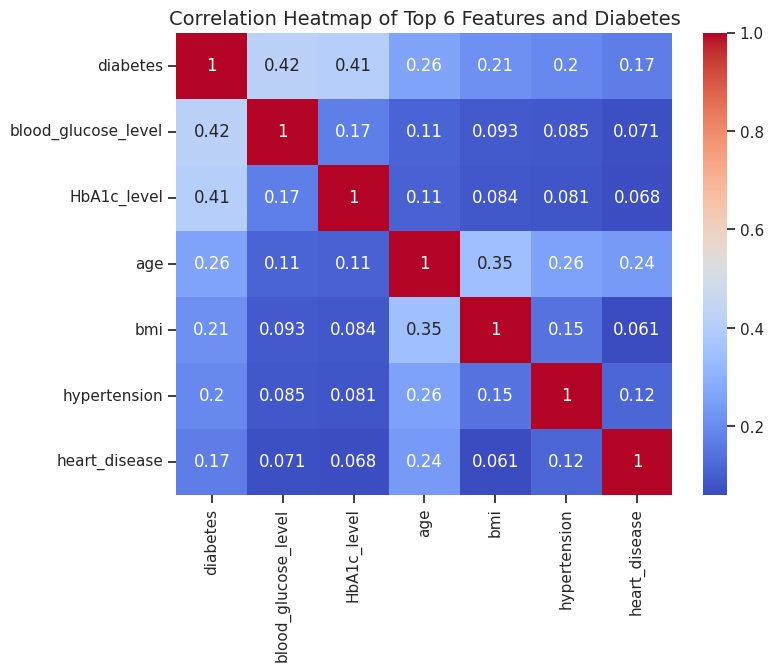

In [ ]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Find the top 6 features that are most strongly correlated with 'diabetes'
top_six = corr_matrix['diabetes'].nlargest(7).index

# Create a heatmap of the correlation matrix for the top 6 features
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data[top_six].corr(), annot=True, cmap='coolwarm', ax=ax, annot_kws={'fontsize': 12})
ax.set_title('Correlation Heatmap of Top 6 Features and Diabetes', fontsize=14)

# Show the plot
plt.show()


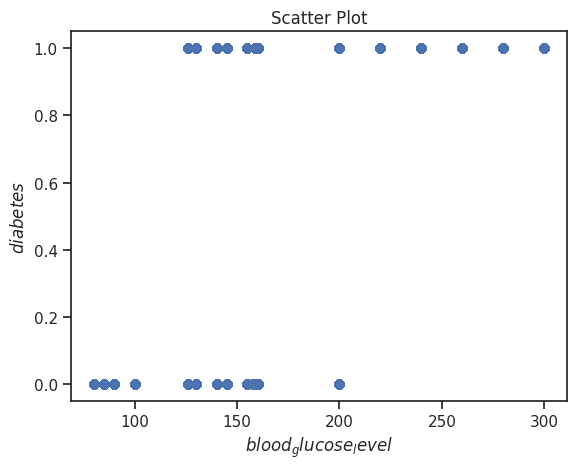

In [ ]:
#Plot scatter plot
plt.scatter(data.blood_glucose_level, data.diabetes)
plt.xlabel("$blood_glucose_level$")
plt.ylabel("$diabetes$")
plt.title("Scatter Plot")
plt.show()

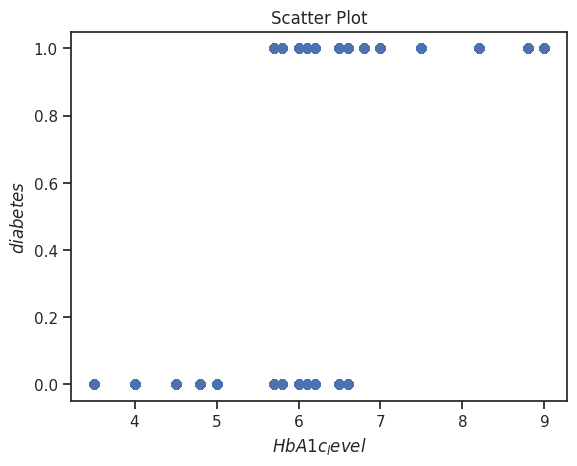

In [ ]:
#Plot scatter plot
plt.scatter(data.HbA1c_level, data.diabetes)
plt.xlabel("$HbA1c_level$")
plt.ylabel("$diabetes$")
plt.title("Scatter Plot")
plt.show()

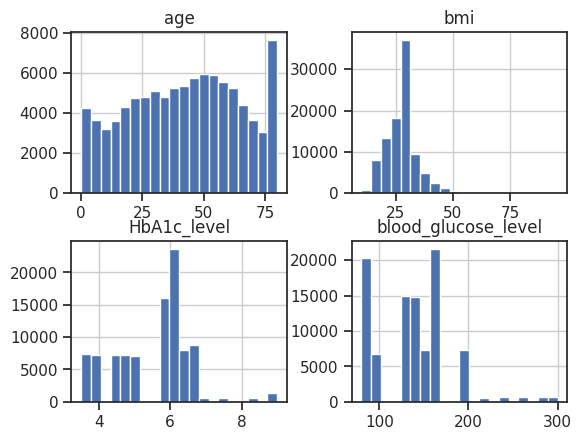

In [ ]:
import matplotlib.pyplot as plt

# to see how the 'Age', 'bmi', 'HbA1c_level', and 'blood_glucose_level' features are distributed in the dataset
data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].hist(bins=20)
plt.show()

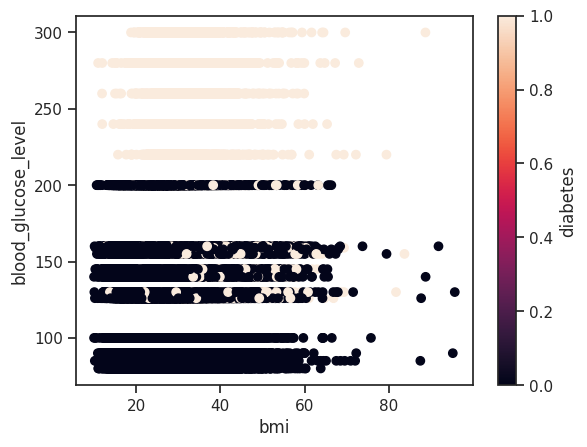

In [ ]:
import matplotlib.pyplot as plt

# Create a scatterplot between the 'bmi' and 'blood_glucose_level' features, colored by 'diabetes'
plt.scatter(data['bmi'], data['blood_glucose_level'], c=data['diabetes'])

# Add labels and a colorbar
plt.xlabel('bmi')
plt.ylabel('blood_glucose_level')
plt.colorbar(label='diabetes')

# Show the plot
plt.show()

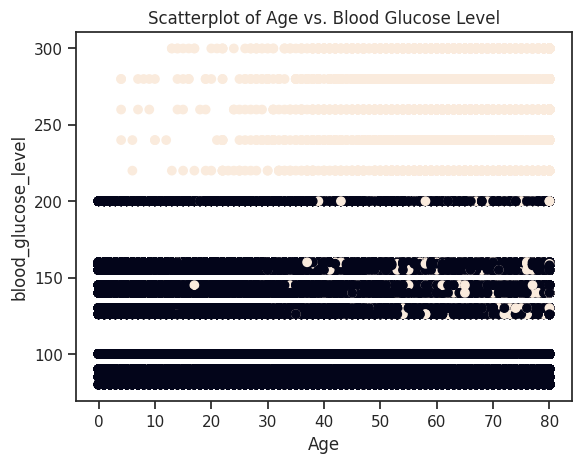

In [ ]:
import matplotlib.pyplot as plt

# Create a scatterplot between the 'Age' and 'blood_glucose_level' features, colored by 'diabetes'
plt.scatter(data['age'], data['blood_glucose_level'], c=data['diabetes'])

# Add labels and a title
plt.xlabel('Age')
plt.ylabel('blood_glucose_level')
plt.title('Scatterplot of Age vs. Blood Glucose Level')

# Show the plot
plt.show()


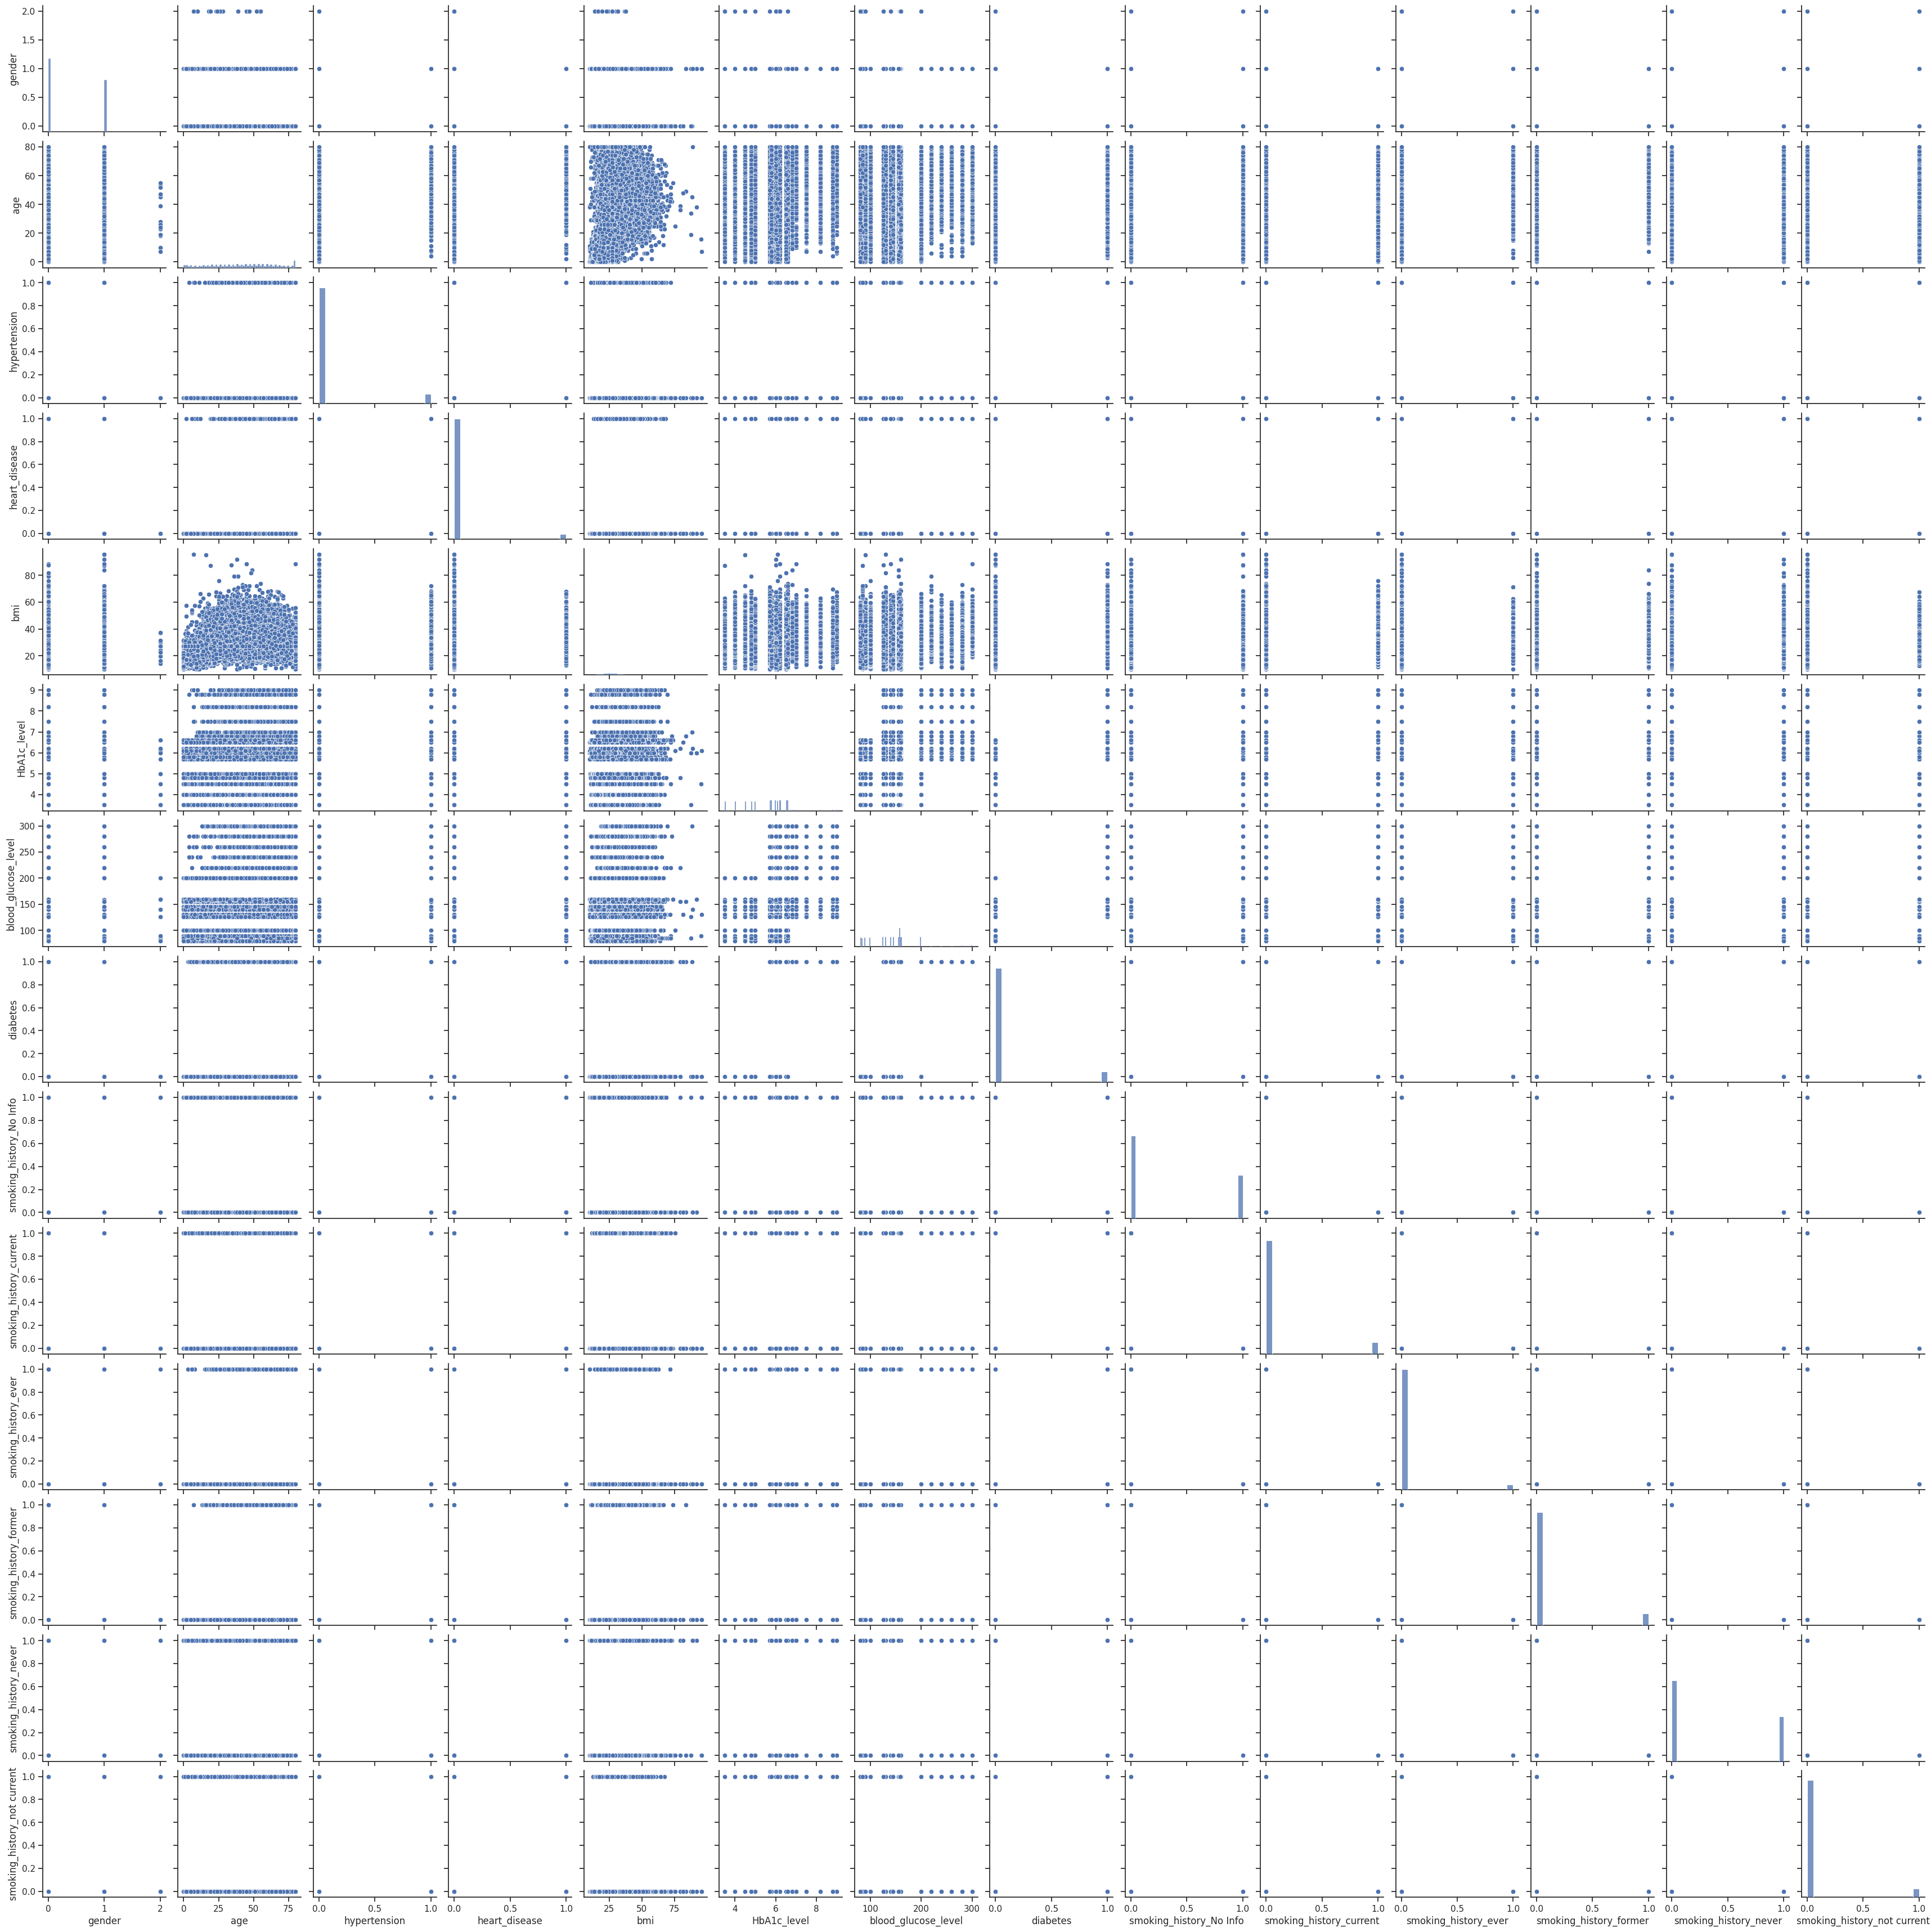

In [ ]:
sns.set_theme(style = "ticks")
sns.pairplot(data)
plt.show()

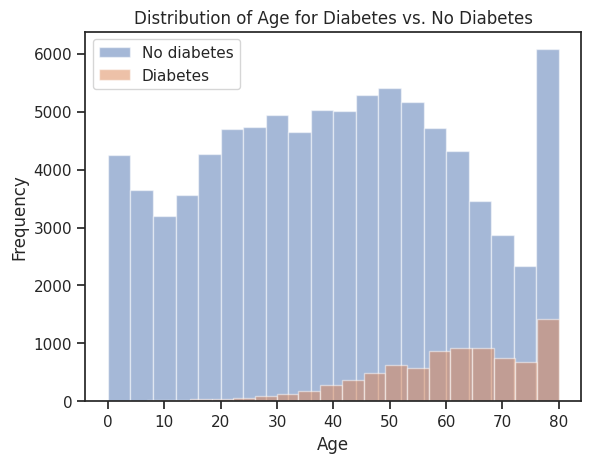

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
data.loc[data['diabetes'] == 0]['age'].plot(kind='hist', bins=20, alpha=0.5, label='No diabetes')
data.loc[data['diabetes'] == 1]['age'].plot(kind='hist', bins=20, alpha=0.5, label='Diabetes')
# labels and a title
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Age for Diabetes vs. No Diabetes')
plt.legend()

# Show the plot
plt.show()


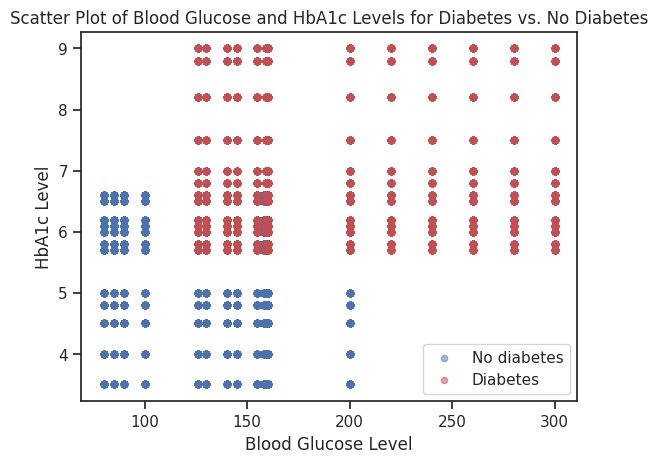

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
data.loc[data['diabetes'] == 0].plot(kind='scatter', x='blood_glucose_level', y='HbA1c_level', alpha=0.5, label='No diabetes', ax=ax)
data.loc[data['diabetes'] == 1].plot(kind='scatter', x='blood_glucose_level', y='HbA1c_level', alpha=0.5, label='Diabetes', color='r', ax=ax)

# labels and a title
ax.set_xlabel('Blood Glucose Level')
ax.set_ylabel('HbA1c Level')
ax.set_title('Scatter Plot of Blood Glucose and HbA1c Levels for Diabetes vs. No Diabetes')
plt.legend()

# Show the plot
plt.show()


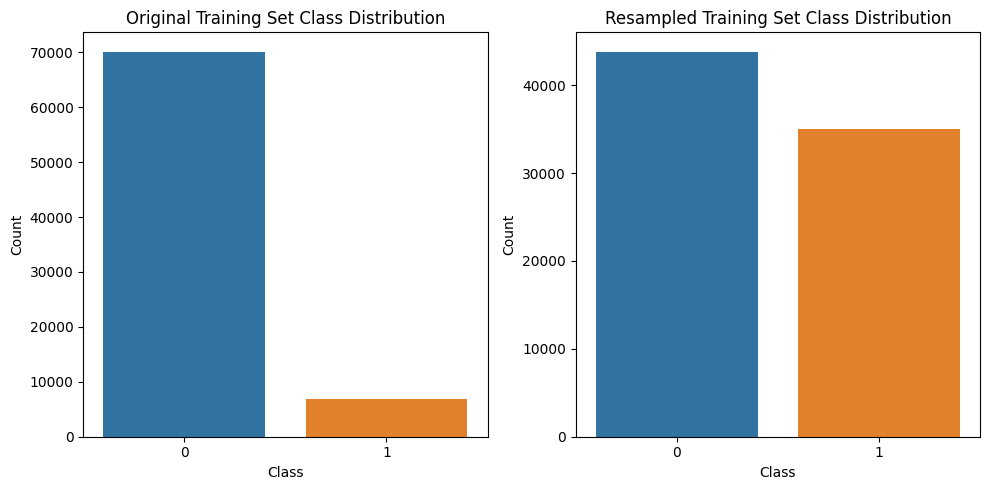

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot original training set class distribution
sns.countplot(x=Y_train, ax=ax1)
ax1.set_title('Original Training Set Class Distribution')
ax1.set_xlabel('Class')
ax1.set_ylabel('Count')

# Plot resampled training set class distribution
sns.countplot(x=Y_train_resampled, ax=ax2)
ax2.set_title('Resampled Training Set Class Distribution')
ax2.set_xlabel('Class')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()


# **Normalization**

In [ ]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)
print("Mean of X_train_resampled_scaled:", np.mean(X_train_resampled_scaled, axis=0))
print("\nStandard deviation of X_train_resampled_scaled:", np.std(X_train_resampled_scaled, axis=0))
print("\nMean of X_test_scaled:", np.mean(X_test_scaled, axis=0))
print("\nStandard deviation of X_test_scaled:", np.std(X_test_scaled, axis=0))

Mean of X_train_resampled_scaled: [ 9.88094311e-18  7.90475448e-17  3.23189181e-17  5.92856586e-17
 -6.58729540e-18 -1.11984022e-15 -1.64682385e-16  2.63491816e-17
  6.25793063e-17 -3.45833009e-17  2.05852981e-17 -1.11984022e-16
 -2.30555339e-17]

Standard deviation of X_train_resampled_scaled: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Mean of X_test_scaled: [ 0.09681313 -0.33546781 -0.02276343 -0.01011115 -0.23547204 -0.42863854
 -0.38356842  0.25711413  0.09904027  0.08509438  0.01696343  0.11192054
  0.1007481 ]

Standard deviation of X_test_scaled: [1.02207943 1.03072308 0.96473206 0.97682485 0.93514954 0.87753865
 0.73563924 1.12165307 1.15100503 1.21370159 1.02405461 1.03975051
 1.19363488]


In [ ]:
pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# RNN

Reshaping dataset to fit in RNN Model

In [ ]:
RNN_X_train = X_train_resampled_scaled.reshape((-1, 1, 13))
RNN_X_test = X_test_scaled.reshape((-1, 1, 13))
RNN_Y_train = np.array(Y_train_resampled)
RNN_Y_test = np.array(Y_test)
print(RNN_X_train.shape)
print(RNN_Y_train.shape)
print(RNN_X_test.shape)
print(RNN_Y_test.shape)

(69034, 1, 13)
(69034,)
(28844, 1, 13)
(28844,)


Base Model

In [ ]:
#Base Model
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SimpleRNN, Dropout

rnn_model = Sequential()

rnn_model.add(SimpleRNN(64, input_shape=(1, 13),activation='relu'))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(1,activation='sigmoid'))

In [ ]:
rnn_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
rnn_history = rnn_model.fit(RNN_X_train, RNN_Y_train, epochs=10, batch_size=100,validation_data=(RNN_X_test,RNN_Y_test))

Epoch 1/10
691/691 [==============================] - 6s 5ms/step - loss: 0.2346 - accuracy: 0.9026 - val_loss: 0.1626 - val_accuracy: 0.9312
Epoch 2/10
691/691 [==============================] - 6s 9ms/step - loss: 0.1728 - accuracy: 0.9231 - val_loss: 0.1654 - val_accuracy: 0.9286
Epoch 3/10
691/691 [==============================] - 8s 11ms/step - loss: 0.1686 - accuracy: 0.9235 - val_loss: 0.1599 - val_accuracy: 0.9319
Epoch 4/10
691/691 [==============================] - 9s 13ms/step - loss: 0.1676 - accuracy: 0.9233 - val_loss: 0.1640 - val_accuracy: 0.9288
Epoch 5/10
691/691 [==============================] - 10s 14ms/step - loss: 0.1653 - accuracy: 0.9250 - val_loss: 0.1517 - val_accuracy: 0.9372
Epoch 6/10
691/691 [==============================] - 9s 12ms/step - loss: 0.1627 - accuracy: 0.9246 - val_loss: 0.1588 - val_accuracy: 0.9319
Epoch 7/10
691/691 [==============================] - 10s 15ms/step - loss: 0.1602 - accuracy: 0.9265 - val_loss: 0.1514 - val_accuracy: 0.9355

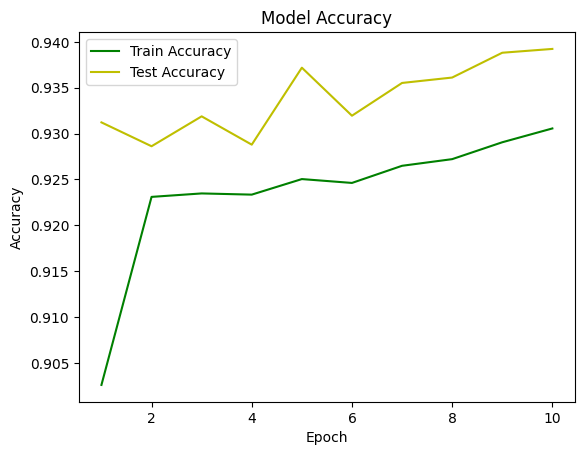

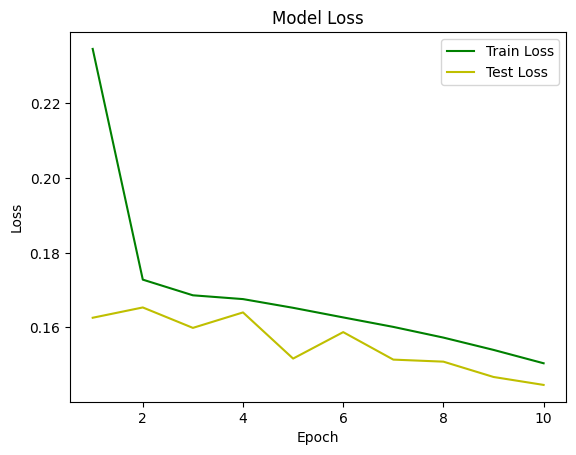

In [ ]:
#Plot
import matplotlib.pyplot as plt

acc2=rnn_history.history['accuracy']
val_acc=rnn_history.history['val_accuracy']
loss2=rnn_history.history['loss']
val_loss=rnn_history.history['val_loss']

epochs = range(1,len(acc2)+1)

plt.title('Model Accuracy')
plt.plot(epochs,acc2,'g',label='Train Accuracy')
plt.plot(epochs,val_acc,'y',label="Test Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
plt.title('Model Loss')
plt.plot(epochs,loss2,'g',label='Train Loss')
plt.plot(epochs,val_loss,'y',label='Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

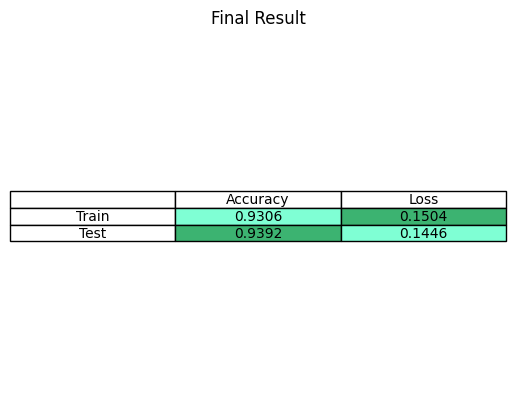

In [ ]:
#Table for Final Result
final_loss = rnn_history.history['loss'][-1]
final_accuracy = rnn_history.history['accuracy'][-1]
final_val_loss = rnn_history.history['val_loss'][-1]
final_val_accuracy = rnn_history.history['val_accuracy'][-1]

colors = [['white', 'white', 'white'],
          ['white', 'aquamarine', 'mediumseagreen'],
          ['white', 'mediumseagreen', 'aquamarine']]

# Create a table with the final values
fig, ax = plt.subplots()
ax.axis('off')
table_data = [['', 'Accuracy', 'Loss'],
              ['Train', format(final_accuracy,".4f"), format(final_loss,".4f")],
              ['Test', format(final_val_accuracy,".4f"), format(final_val_loss,".4f")]]
ax.table(cellText=table_data,cellColours=colors, colLabels=None, cellLoc='center', loc='center')
plt.title("Final Result")
plt.show()

902/902 [==============================] - 2s 2ms/step


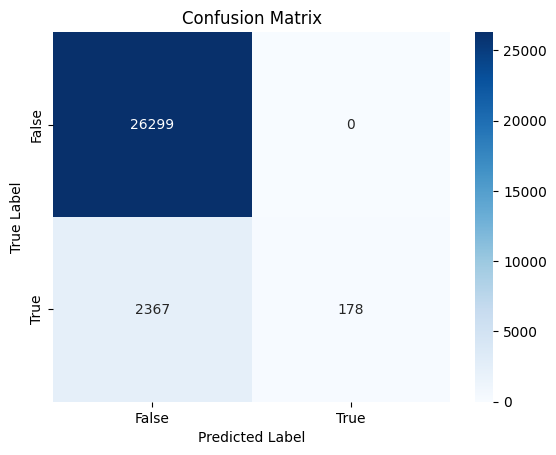

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(RNN_Y_test.astype(int), rnn_model.predict(RNN_X_test).astype(int))

labels = ['False', 'True']
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

---

Modified Base Model

In [ ]:
from keras import initializers
from keras import regularizers
from keras.callbacks import EarlyStopping
#Base Model with additional layers, initializer, regularizer
rnn_model = Sequential()

rnn_model.add(SimpleRNN(128, input_shape=(1, 13),activation='relu',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.01), return_sequences=True))
rnn_model.add(Dropout(0.5))
rnn_model.add(LSTM(128, activation='relu'))
rnn_model.add(Dropout(0.5))
rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(Dropout(0.5))
rnn_model.add(Dense(1,activation='sigmoid'))

In [ ]:
rnn_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
rnn_history = rnn_model.fit(RNN_X_train, RNN_Y_train, epochs=10, batch_size=100,validation_data=(RNN_X_test,RNN_Y_test))

Epoch 1/10
691/691 [==============================] - 9s 13ms/step - loss: 0.1583 - accuracy: 0.9296 - val_loss: 0.1402 - val_accuracy: 0.9431
Epoch 2/10
691/691 [==============================] - 12s 17ms/step - loss: 0.1562 - accuracy: 0.9302 - val_loss: 0.1387 - val_accuracy: 0.9472
Epoch 3/10
691/691 [==============================] - 10s 15ms/step - loss: 0.1557 - accuracy: 0.9298 - val_loss: 0.1345 - val_accuracy: 0.9466
Epoch 4/10
691/691 [==============================] - 8s 12ms/step - loss: 0.1563 - accuracy: 0.9306 - val_loss: 0.1337 - val_accuracy: 0.9506
Epoch 5/10
691/691 [==============================] - 10s 15ms/step - loss: 0.1569 - accuracy: 0.9299 - val_loss: 0.1421 - val_accuracy: 0.9370
Epoch 6/10
691/691 [==============================] - 11s 16ms/step - loss: 0.1563 - accuracy: 0.9302 - val_loss: 0.1410 - val_accuracy: 0.9416
Epoch 7/10
691/691 [==============================] - 8s 12ms/step - loss: 0.1558 - accuracy: 0.9309 - val_loss: 0.1377 - val_accuracy: 0.

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
y_pred = rnn_model.predict(RNN_X_test)
auc_roc = roc_auc_score(RNN_Y_test, y_pred)
print('AUC-ROC: {:.4f}'.format(auc_roc))
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]
print(classification_report(RNN_Y_test, y_pred_binary))

902/902 [==============================] - 3s 3ms/step
AUC-ROC: 0.9697
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     26299
           1       0.64      0.79      0.71      2545

    accuracy                           0.94     28844
   macro avg       0.81      0.87      0.84     28844
weighted avg       0.95      0.94      0.95     28844



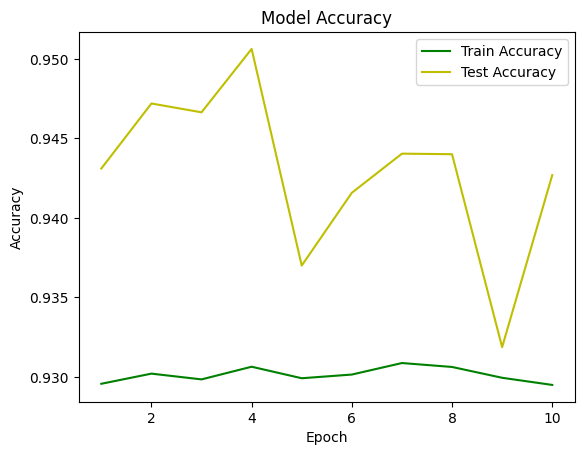

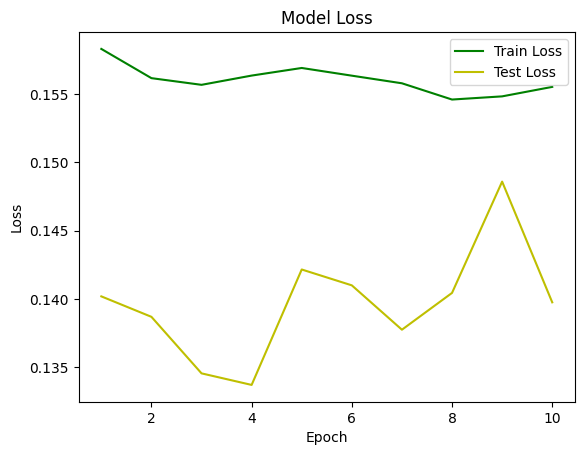

In [ ]:
#Plot
import matplotlib.pyplot as plt

acc2=rnn_history.history['accuracy']
val_acc=rnn_history.history['val_accuracy']
loss2=rnn_history.history['loss']
val_loss=rnn_history.history['val_loss']

epochs = range(1,len(acc2)+1)

plt.title('Model Accuracy')
plt.plot(epochs,acc2,'g',label='Train Accuracy')
plt.plot(epochs,val_acc,'y',label="Test Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
plt.title('Model Loss')
plt.plot(epochs,loss2,'g',label='Train Loss')
plt.plot(epochs,val_loss,'y',label='Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

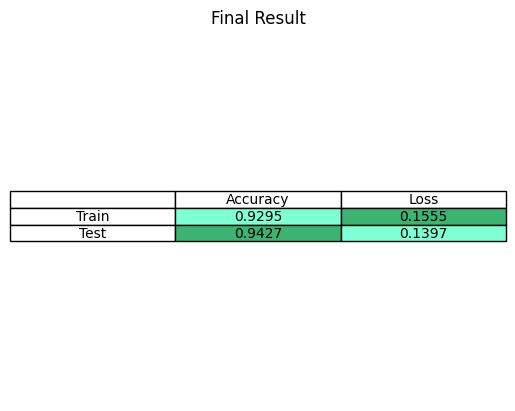

In [ ]:
#Table for Final Result
final_loss = rnn_history.history['loss'][-1]
final_accuracy = rnn_history.history['accuracy'][-1]
final_val_loss = rnn_history.history['val_loss'][-1]
final_val_accuracy = rnn_history.history['val_accuracy'][-1]

colors = [['white', 'white', 'white'],
          ['white', 'aquamarine', 'mediumseagreen'],
          ['white', 'mediumseagreen', 'aquamarine']]

# Create a table with the final values
fig, ax = plt.subplots()
ax.axis('off')
table_data = [['', 'Accuracy', 'Loss'],
              ['Train', format(final_accuracy,".4f"), format(final_loss,".4f")],
              ['Test', format(final_val_accuracy,".4f"), format(final_val_loss,".4f")]]
ax.table(cellText=table_data,cellColours=colors, colLabels=None, cellLoc='center', loc='center')
plt.title("Final Result")
plt.show()

902/902 [==============================] - 2s 2ms/step


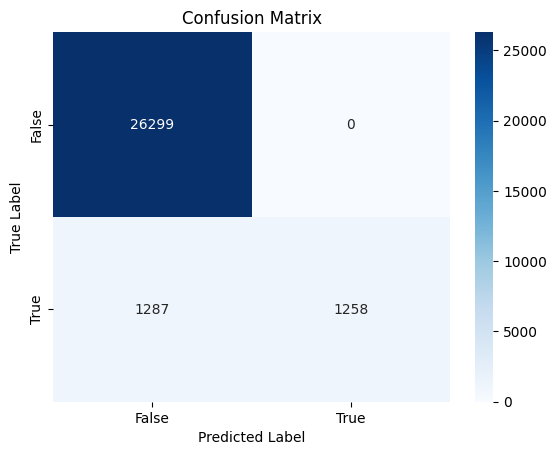

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(RNN_Y_test.astype(int), rnn_model.predict(RNN_X_test).astype(int))

labels = ['False', 'True']
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Hyperparameter Tuning

In [ ]:
#Create model function
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
def create_rnn_model(activation, dropout_rate):
  model = Sequential()
  model.add(SimpleRNN(128, input_shape=(1, 13),activation=activation,kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.01),return_sequences=True))
  model.add(Dropout(dropout_rate))
  model.add(LSTM(128, activation=activation))
  model.add(Dropout(dropout_rate))
  model.add(Dense(64, activation=activation))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model

In [ ]:
#Hyperparameter Tuning
rnn_model2= KerasClassifier(build_fn=create_rnn_model,verbose=1, activation='relu', dropout_rate=0.2)#verbose is to show the progress of the training

#Parameters
batch_size = [100,200]
epochs = [10,15]
optimizer = ['SGD','RMSprop','Adam']
activation = ['softmax','relu','tanh','sigmoid']
dropout_rate = [0.2,0.5]

param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer, activation=activation,dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=rnn_model2, param_grid=param_grid,n_jobs=-1,cv=3)
grid_result = grid.fit(RNN_X_train,RNN_Y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
691/691 [==============================] - 14s 14ms/step - loss: 1.0699 - accuracy: 0.9096
Epoch 2/10
691/691 [==============================] - 10s 14ms/step - loss: 0.2301 - accuracy: 0.9217
Epoch 3/10
691/691 [==============================] - 8s 11ms/step - loss: 0.1754 - accuracy: 0.9255
Epoch 4/10
691/691 [==============================] - 10s 15ms/step - loss: 0.1629 - accuracy: 0.9284
Epoch 5/10
691/691 [==============================] - 8s 12ms/step - loss: 0.1547 - accuracy: 0.9314
Epoch 6/10
691/691 [==============================] - 10s 14ms/step - loss: 0.1507 - accuracy: 0.9331
Epoch 7/10
691/691 [==============================] - 10s 14ms/step - loss: 0.1482 - accuracy: 0.9332
Epoch 8/10
691/691 [==============================] - 8s 11ms/step - loss: 0.1470 - accuracy: 0.9339
Epoch 9/10
691/691 [==============================] - 10s 14ms/step - loss: 0.1457 - accuracy: 0.9333
Epoch 10/10
691/691 [==============================] - 8s 11ms/step - loss: 0.1446 - 

In [ ]:
#The best parameters value
print("Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean,stdev, param in zip(means,stds,params):
  print("%f (%f) with %r" % (mean,stdev,param))

Best: 0.932106 using {'activation': 'relu', 'batch_size': 100, 'dropout_rate': 0.2, 'epochs': 10, 'optimizer': 'SGD'}
0.555552 (0.000011) with {'activation': 'softmax', 'batch_size': 100, 'dropout_rate': 0.2, 'epochs': 10, 'optimizer': 'SGD'}
0.555552 (0.000011) with {'activation': 'softmax', 'batch_size': 100, 'dropout_rate': 0.2, 'epochs': 10, 'optimizer': 'RMSprop'}
0.555552 (0.000011) with {'activation': 'softmax', 'batch_size': 100, 'dropout_rate': 0.2, 'epochs': 10, 'optimizer': 'Adam'}
0.555552 (0.000011) with {'activation': 'softmax', 'batch_size': 100, 'dropout_rate': 0.2, 'epochs': 15, 'optimizer': 'SGD'}
0.555552 (0.000011) with {'activation': 'softmax', 'batch_size': 100, 'dropout_rate': 0.2, 'epochs': 15, 'optimizer': 'RMSprop'}
0.555552 (0.000011) with {'activation': 'softmax', 'batch_size': 100, 'dropout_rate': 0.2, 'epochs': 15, 'optimizer': 'Adam'}
0.555552 (0.000011) with {'activation': 'softmax', 'batch_size': 100, 'dropout_rate': 0.5, 'epochs': 10, 'optimizer': 'SGD

# DNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization
from keras import initializers
from keras import regularizers
from keras.callbacks import EarlyStopping

In [ ]:
DNN_X_train = X_train_resampled_scaled
DNN_X_test = X_test_scaled
DNN_Y_train = Y_train_resampled
DNN_Y_test = Y_test

In [ ]:
L1=64
L2=32
L3=16


model= Sequential()
model.add(Dense(L1,input_dim=13,activation='relu',kernel_initializer='he_normal',
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(L2,activation='relu'))
model.add(Dense(L3,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')
history=model.fit (DNN_X_train,DNN_Y_train,epochs=20,batch_size=100,validation_data=(DNN_X_test,DNN_Y_test))

Epoch 1/20
691/691 [==============================] - 5s 6ms/step - loss: 0.6875 - accuracy: 0.9093 - val_loss: 0.2857 - val_accuracy: 0.9357
Epoch 2/20
691/691 [==============================] - 5s 8ms/step - loss: 0.2332 - accuracy: 0.9243 - val_loss: 0.2065 - val_accuracy: 0.9256
Epoch 3/20
691/691 [==============================] - 3s 5ms/step - loss: 0.1850 - accuracy: 0.9264 - val_loss: 0.1532 - val_accuracy: 0.9456
Epoch 4/20
691/691 [==============================] - 3s 4ms/step - loss: 0.1662 - accuracy: 0.9295 - val_loss: 0.1519 - val_accuracy: 0.9470
Epoch 5/20
691/691 [==============================] - 4s 5ms/step - loss: 0.1548 - accuracy: 0.9317 - val_loss: 0.1388 - val_accuracy: 0.9451
Epoch 6/20
691/691 [==============================] - 2s 3ms/step - loss: 0.1492 - accuracy: 0.9339 - val_loss: 0.1387 - val_accuracy: 0.9462
Epoch 7/20
691/691 [==============================] - 2s 3ms/step - loss: 0.1467 - accuracy: 0.9336 - val_loss: 0.1485 - val_accuracy: 0.9366
Epoch 

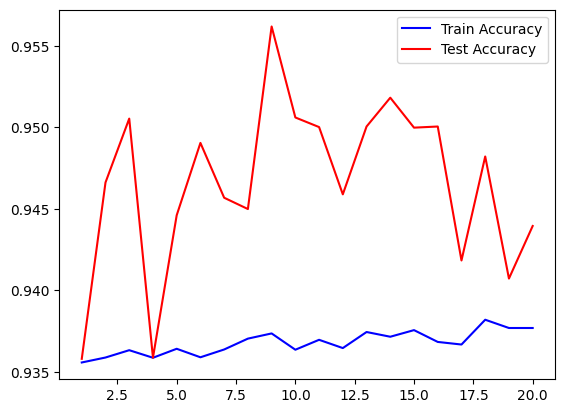

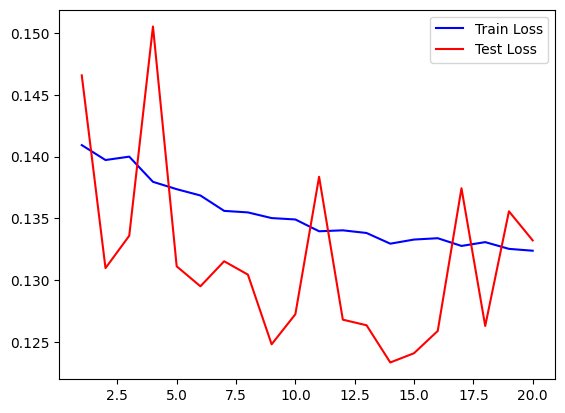

In [ ]:
import matplotlib.pyplot as plt
acc2= history.history['accuracy']
val_acc= history.history['val_accuracy']
loss2= history.history['loss']
val_loss= history.history['val_loss']

epochs= range(1,len(acc2)+1)

plt.plot(epochs,acc2,'b',label="Train Accuracy")
plt.plot(epochs,val_acc,'r',label="Test Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

902/902 [==============================] - 2s 2ms/step


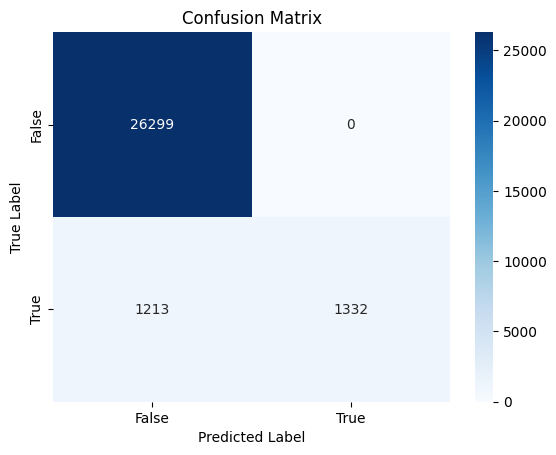

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm = confusion_matrix(DNN_Y_test.astype(int), model.predict(DNN_X_test).astype(int))

labels = ['False', 'True']
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
#Different Architecture (4 Layers DNN)
model = Sequential()
model.add(Dense(128, input_dim=13, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit (DNN_X_train,DNN_Y_train,epochs=20,batch_size=100,validation_data=(DNN_X_test,DNN_Y_test))

Epoch 1/20
691/691 [==============================] - 7s 7ms/step - loss: 0.2273 - accuracy: 0.9007 - val_loss: 0.1489 - val_accuracy: 0.9435
Epoch 2/20
691/691 [==============================] - 5s 7ms/step - loss: 0.1746 - accuracy: 0.9209 - val_loss: 0.1515 - val_accuracy: 0.9449
Epoch 3/20
691/691 [==============================] - 3s 5ms/step - loss: 0.1622 - accuracy: 0.9251 - val_loss: 0.1477 - val_accuracy: 0.9450
Epoch 4/20
691/691 [==============================] - 5s 7ms/step - loss: 0.1531 - accuracy: 0.9275 - val_loss: 0.1343 - val_accuracy: 0.9499
Epoch 5/20
691/691 [==============================] - 4s 6ms/step - loss: 0.1450 - accuracy: 0.9311 - val_loss: 0.1219 - val_accuracy: 0.9533
Epoch 6/20
691/691 [==============================] - 3s 4ms/step - loss: 0.1396 - accuracy: 0.9332 - val_loss: 0.1175 - val_accuracy: 0.9508
Epoch 7/20
691/691 [==============================] - 3s 4ms/step - loss: 0.1355 - accuracy: 0.9342 - val_loss: 0.1198 - val_accuracy: 0.9526
Epoch 

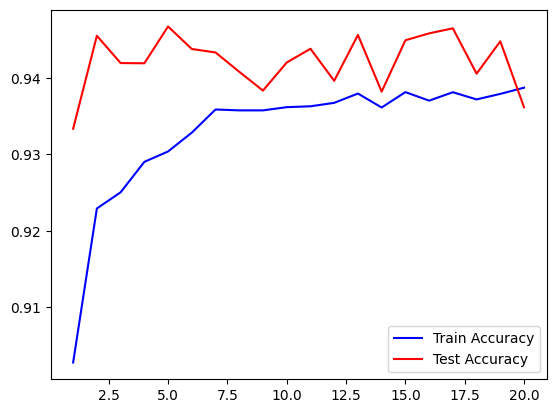

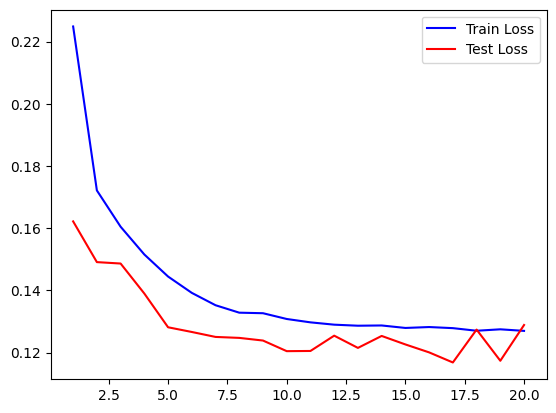

In [ ]:
acc2= history.history['accuracy']
val_acc= history.history['val_accuracy']
loss2= history.history['loss']
val_loss= history.history['val_loss']

epochs= range(1,len(acc2)+1)

plt.plot(epochs,acc2,'b',label="Train Accuracy")
plt.plot(epochs,val_acc,'r',label="Test Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

902/902 [==============================] - 2s 2ms/step


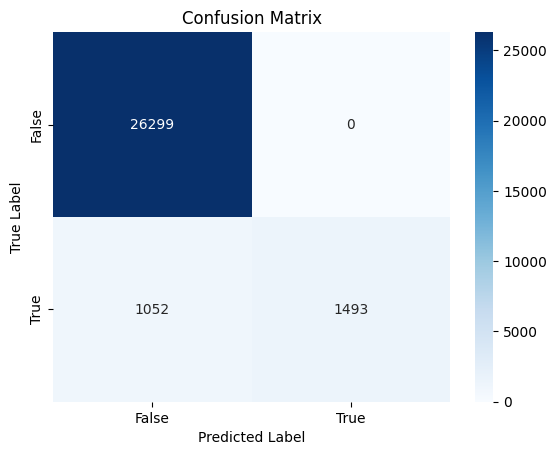

In [ ]:
#Confusion Matrix
cm = confusion_matrix(DNN_Y_test.astype(int), model.predict(DNN_X_test).astype(int))

labels = ['False', 'True']
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
#Hyperparameter Tuning
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
def create_model(optimizer='adam', activation='relu', dropout_rate=0.0,batch_size=100,epochs=20):
    model = Sequential()
    model.add(Dense(64, input_dim=13, activation=activation))
    model.add(BatchNormalization())
    model.add(Dense(32, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
# Create the KerasClassifier object
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=100, verbose=1)

<ipython-input-25-ceb5a1ad9992>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=100, verbose=1)


In [ ]:
param_grid = {'optimizer': ['SGD','RMSprop','Adagrad','Adam','Adamax'],
              'activation': ['relu', 'tanh'],
              'dropout_rate': [0.0, 0.2, 0.3]}

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=1)


In [ ]:
grid_result = grid.fit(DNN_X_train, DNN_Y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Epoch 1/50
691/691 [==============================] - 4s 3ms/step - loss: 0.1941 - accuracy: 0.9143
Epoch 2/50
691/691 [==============================] - 3s 4ms/step - loss: 0.1623 - accuracy: 0.9254
Epoch 3/50
691/691 [==============================] - 2s 3ms/step - loss: 0.1496 - accuracy: 0.9292
Epoch 4/50
691/691 [==============================] - 2s 3ms/step - loss: 0.1405 - accuracy: 0.9329
Epoch 5/50
691/691 [==============================] - 2s 3ms/step - loss: 0.1353 - accuracy: 0.9339
Epoch 6/50
691/691 [==============================] - 2s 3ms/step - loss: 0.1333 - accuracy: 0.9350
Epoch 7/50
691/691 [==============================] - 2s 2ms/step - loss: 0.1320 - accuracy: 0.9358
Epoch 8/50
691/691 [==============================] - 2s 3ms/step - loss: 0.1294 - accuracy: 0.9374
Epoch 9/50
691/691 [==============================] - 3s 4ms/step - loss: 0.1291 - accuracy: 0.9375
Epoch 10/50
691/691 [==================

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean,stdev, param in zip(means,stds,params):
  print("%f (%f) with %r" % (mean,stdev,param))

Best: 0.895182 using {'activation': 'relu', 'dropout_rate': 0.0, 'optimizer': 'Adam'}
0.884941 (0.013190) with {'activation': 'relu', 'dropout_rate': 0.0, 'optimizer': 'SGD'}
0.891981 (0.011257) with {'activation': 'relu', 'dropout_rate': 0.0, 'optimizer': 'RMSprop'}
0.880175 (0.007150) with {'activation': 'relu', 'dropout_rate': 0.0, 'optimizer': 'Adagrad'}
0.895182 (0.012231) with {'activation': 'relu', 'dropout_rate': 0.0, 'optimizer': 'Adam'}
0.890228 (0.011147) with {'activation': 'relu', 'dropout_rate': 0.0, 'optimizer': 'Adamax'}
0.881537 (0.010665) with {'activation': 'relu', 'dropout_rate': 0.2, 'optimizer': 'SGD'}
0.890127 (0.012656) with {'activation': 'relu', 'dropout_rate': 0.2, 'optimizer': 'RMSprop'}
0.877205 (0.014988) with {'activation': 'relu', 'dropout_rate': 0.2, 'optimizer': 'Adagrad'}
0.888678 (0.015253) with {'activation': 'relu', 'dropout_rate': 0.2, 'optimizer': 'Adam'}
0.888388 (0.013496) with {'activation': 'relu', 'dropout_rate': 0.2, 'optimizer': 'Adamax'}


# Logistic Regression

Base Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(solver='liblinear',random_state=0)
model.fit(X_train, Y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
model.score(X_test, Y_test)

0.9586049091665511

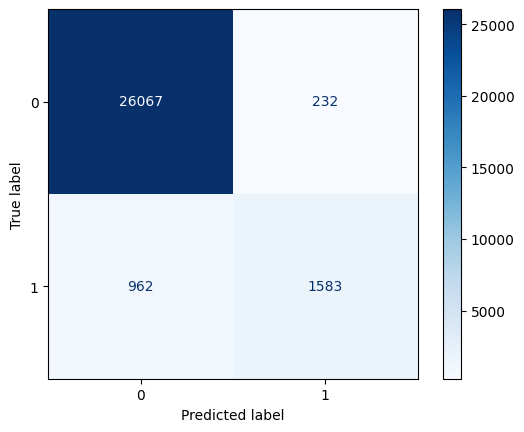

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, model.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

Modified Base Model

In [ ]:
model = LogisticRegression(solver='liblinear', tol = 0.001, C = 0.1, max_iter = 1000,random_state=0)
model.fit(X_train, Y_train)

LogisticRegression(C=0.1, max_iter=1000, random_state=0, solver='liblinear',
                   tol=0.001)

In [ ]:
model.score(X_test, Y_test)

0.9561780612952434

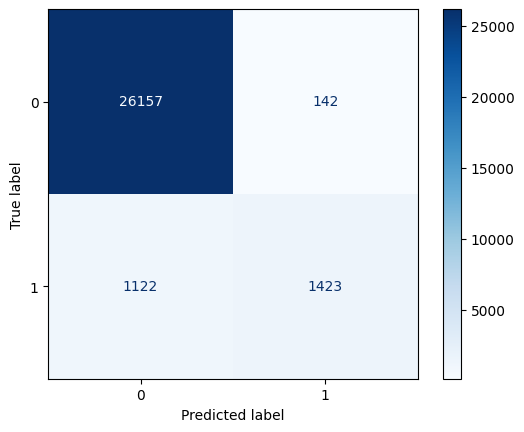

In [ ]:
cm = confusion_matrix(Y_test, model.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()

Hyperparameter Tuning

In [ ]:
model = LogisticRegression()
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
tol = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1]
max_iter = [10, 100, 1000, 10000]


grid = dict(solver=solvers,penalty=penalty, C = c_values, tol=tol, max_iter=max_iter)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,  scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_test, Y_test)
grid_result.best_params_


{'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 1}

In [ ]:
grid_result.best_score_

0.9588476021703836

In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean,stdev, param in zip(means,stds,params):
  print("%f (%f) with %r" % (mean,stdev,param))

0.911697 (0.000826) with {'C': 100, 'max_iter': 10, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 1e-06}
0.911697 (0.000826) with {'C': 100, 'max_iter': 10, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 1e-05}
0.911697 (0.000826) with {'C': 100, 'max_iter': 10, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001}
0.911697 (0.000826) with {'C': 100, 'max_iter': 10, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.001}
0.911697 (0.000826) with {'C': 100, 'max_iter': 10, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.01}
0.911697 (0.000826) with {'C': 100, 'max_iter': 10, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.1}
0.911697 (0.000826) with {'C': 100, 'max_iter': 10, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 1}
0.912841 (0.001033) with {'C': 100, 'max_iter': 10, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-06}
0.912841 (0.001033) with {'C': 100, 'max_iter': 10, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-05}
0.912841 (0.001033) with {'C': 100, 'max_iter': 10, 'penalty': 'l2', 'solver': '

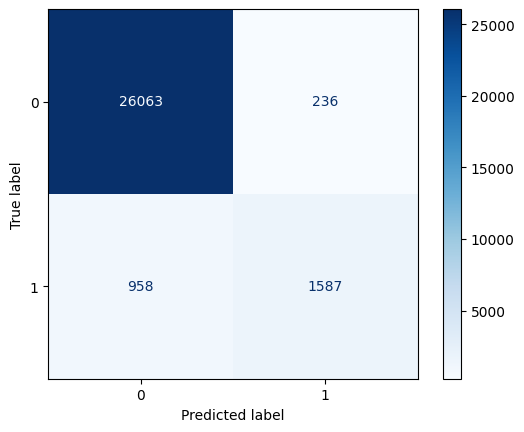

In [ ]:
cm = confusion_matrix(Y_test, grid_result.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_result.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.show()